### Imports

In [1]:
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

### Creating a sample dataset for testing purposes and plotting it

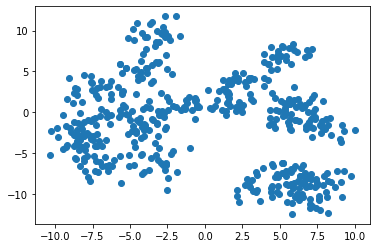

In [2]:
X, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(X[:,0], X[:,1])

### Running KMeans with only one cluster and plotting the centroid too

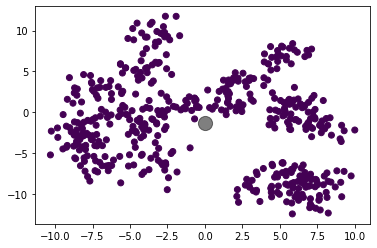

In [3]:
kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', s=200, alpha=0.5)

### Running KMeans with five clusters and plotting the centroids too

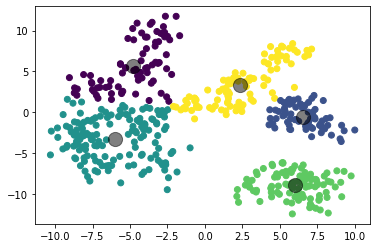

In [4]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', s=200, alpha=0.5)

### Creating a function to find the optimal number of cluster

In [5]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1


### Running the function on this dataset and printing the best number of cluster we should use

In [6]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
n = optimal_number_of_clusters(wcss)
print(n)

4


### PLotting the Elbow Method to visualize the optimal cluster number finding
The Optimal Number of Clusters will be the most distant blue point to the orange line.

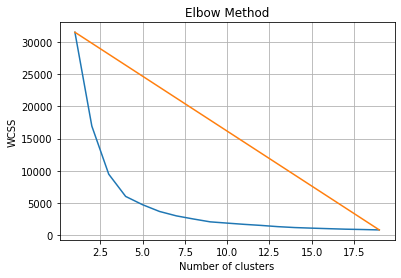

In [7]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

### Running KMeans with the optimal number of clusters and plotting the centroids too

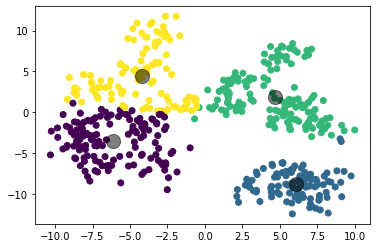

In [8]:
kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', s=200, alpha=0.5)